# Shubh Sinha - 210968172

## KNN from Scratch

In [2]:
#importing the necessary libraries
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

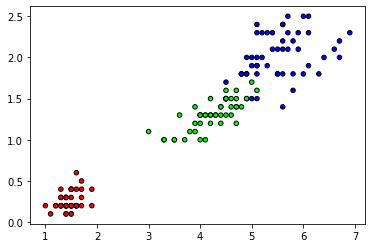

In [3]:
cmap = ListedColormap(['#FF0000','#00FF00', '#0000FF'])

#loading the data-sets
iris = datasets.load_iris()
X, y = iris.data, iris.target

#training and testing data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, stratify = y)

#plotting
plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap = cmap, edgecolor = 'k', s = 20)
plt.show()

In [4]:
import numpy as np
from collections import Counter

#computing the euclidean distance between 2 points
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

#defining KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    #fitting the model
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #predicting the values
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]


In [6]:
#calling the KNN model
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

#printing the predicted values
print(predictions)

[2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2]


In [7]:
#printing the accuracy score
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9333333333333333
